## K-State Honor Code
On my honor, as a student, I **Stephen Ritch** have neither given nor received unauthorized aid on this academic work.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\sjrit\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1339]:
# Import the data
df=pd.read_excel("train_test_dataset1.xlsx")
# Display first five rows
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


With the goal of this contest being to find out what variables influence the number of defects. The variables that I will focus on are...

1. The "YEARS" which is the number of years as a season ticket holder. A higher number leads to higher probability that they will buy a ticket this year and a lower number leads to lower probability that they will defect and not buy a ticket.

2. The "BACKES" which shows if the member is part of the team backer club. 
    1=member of the team's "backer" club
    0=not a member of the team's "backer" club

In [1340]:
df.info()    # Find the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [1341]:
df.isnull().sum()    # Many missing values in CHILD and SPORT

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [1342]:
# Generate a description (e.g. count, mean, standard deviation, min, max)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y2defect,9216.0,0.500000,0.500027,0.0,0.0,0.5,1.0,1.0
Y1G5,9216.0,0.337023,0.472718,0.0,0.0,0.0,1.0,1.0
Y1G4,9216.0,0.510525,0.499916,0.0,0.0,1.0,1.0,1.0
Y1G3,9216.0,0.636719,0.480971,0.0,0.0,1.0,1.0,1.0
Y1G2,9216.0,0.291124,0.454305,0.0,0.0,0.0,1.0,1.0
Y1G1,9216.0,0.480252,0.499637,0.0,0.0,0.0,1.0,1.0
Y1price,9216.0,19.963108,8.820188,15.0,15.0,15.0,25.0,50.0
YEARS,9216.0,6.378038,2.873927,2.0,4.0,6.0,9.0,24.0
BACKER,9216.0,0.489475,0.499916,0.0,0.0,0.0,1.0,1.0
SPORT,4273.0,0.056869,0.250085,0.0,0.0,0.0,0.0,3.0


In [1343]:
# Find out unique values in SPORT ... groupby
df.groupby('SPORT').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL
SPORT,,,,,,,,,,,,,,,,,,
0.0,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,2020,4047,4047,4047,4047,4047
1.0,211,211,211,211,211,211,211,211,211,211,211,211,100,211,211,211,211,211
2.0,13,13,13,13,13,13,13,13,13,13,13,13,7,13,13,13,13,13
3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [1344]:
# Find out unique values in CHILD... groupby
df.groupby('CHILD').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
CHILD,,,,,,,,,,,,,,,,,,
1,582,582,582,582,582,582,582,582,582,582,582,582,582,582,328,582,582,582
,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,1801,3967,3967,3967


In [1345]:
# Find out unique values in COMP ... groupby
df.groupby('COMP').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
COMP,,,,,,,,,,,,,,,,,,
1,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,513,1009,1009,560,1009,1009
,8207,8207,8207,8207,8207,8207,8207,8207,8207,8207,8207,8207,4036,8207,8207,3713,8207,8207


In [1346]:
# Drop the stuff I dont have time for
df = df.drop(['SPORT','COMP','CHILD'], axis=1)

In [1347]:
# Generate a description 
df['GNDR'].describe()

count     9216
unique       3
top          0
freq      4819
Name: GNDR, dtype: int64

GNDR is a shortened version of the word gnarly, meaning high on the scale of dangerousness and coolness. Often used among the skateboard crowd

In [1348]:
# Age is a suffix for any random word.
df['AGE'].describe()

count     9216
unique      82
top           
freq      1993
Name: AGE, dtype: object

In [1349]:
# Generate a description 
df['INCOME'].describe()

count     9216
unique       8
top           
freq      1944
Name: INCOME, dtype: object

The Constitution of the United States of America makes reference to income, but does not define it. No law in the USC defines income. 

In [1350]:
# A word that means something different to each person who uses it
df['OWNHOME'].describe()

count     9216
unique       3
top          1
freq      5186
Name: OWNHOME, dtype: int64

In [1351]:
# find out unique values in OWNHOME ... groupby
df.groupby('OWNHOME').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
OWNHOME,,,,,,,,,,,,,,,
0,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031
1,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186
,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999


In [1352]:
# find out unique values in INCOME ... groupby
df.groupby('INCOME').count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,GNDR,OWNHOME,PCTMARR,HOMEVAL
INCOME,,,,,,,,,,,,,,,
0,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875
1,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
2,853,853,853,853,853,853,853,853,853,853,853,853,853,853,853
3,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
4,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557
5,763,763,763,763,763,763,763,763,763,763,763,763,763,763,763
6,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704
,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944


In [1353]:
# I replace any empty strings in the column with np.nan
df['AGE'].replace(' ', np.nan, inplace=True)

# Now I can drop the null values
#df.dropna(subset=['AGE'], inplace=True)
# I went another direction with this....

In [1354]:
# I replace any empty strings in the column with np.nan
df['INCOME'].replace(' ', np.nan, inplace=True)

In [1355]:
# I replace any empty strings in the column with np.nan
df['GNDR'].replace(' ', np.nan, inplace=True)

In [1356]:
# I replace any empty strings in the column with np.nan
df['OWNHOME'].replace(' ', np.nan, inplace=True)

In [1357]:
# Many missing values in Age and Cabin
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [1358]:
#so let's convert object to numerical
df = df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


C:\Users\sjrit\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [1359]:
#drop the GNDR category # dont be sexist
df.dropna(subset=['GNDR'], inplace=True)

In [1360]:
#df.dropna(subset=['AGE'], inplace=True)

In [1361]:
#df.dropna(subset=['INCOME'], inplace=True)

In [1362]:
#drop the Age category # dont be Ageist or mean to poor people
df = df.drop(['OWNHOME', 'AGE', 'INCOME'], axis=1)

In [1363]:
# Check the number of data points we have kept
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9215
Data columns (total 13 columns):
FAKEID      8718 non-null object
Y2defect    8718 non-null int64
Y1G5        8718 non-null int64
Y1G4        8718 non-null int64
Y1G3        8718 non-null int64
Y1G2        8718 non-null int64
Y1G1        8718 non-null int64
Y1price     8718 non-null int64
YEARS       8718 non-null int64
BACKER      8718 non-null int64
GNDR        8718 non-null float64
PCTMARR     8718 non-null int64
HOMEVAL     8718 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 953.5+ KB


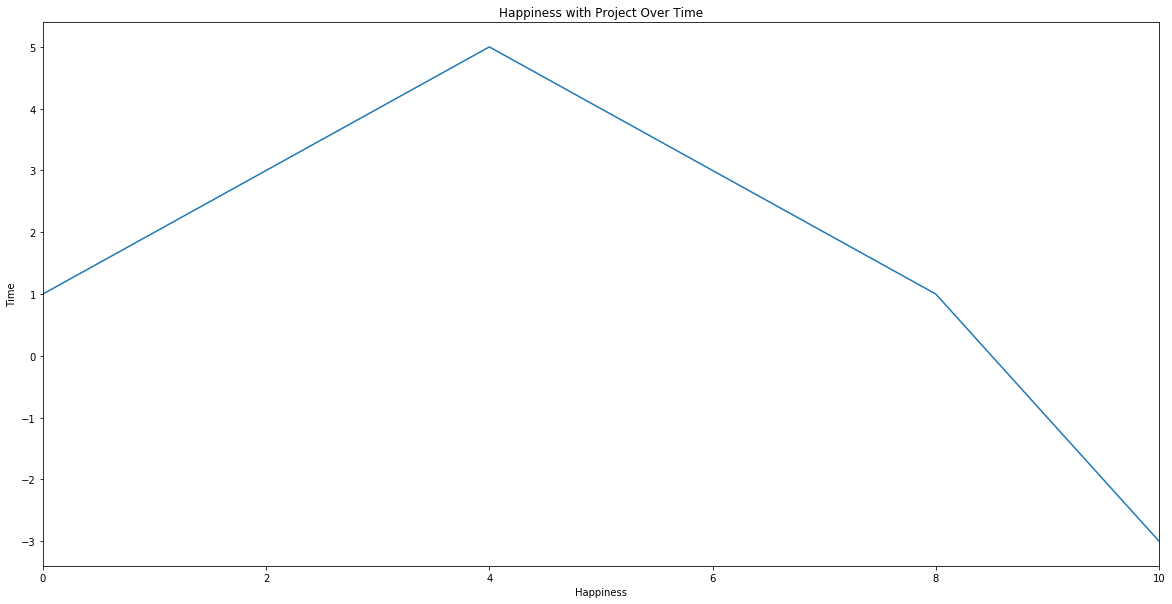

In [11]:
# This is a chart I made to show you how sad and confused I got overtime
s = pd.Series([1,2,3,4,5,4,3,2,1,-1,-3])

s.plot(figsize=(20,10))
plt.xlabel('Happiness')
plt.ylabel('Time')
plt.title("Happiness with Project Over Time");

This is a chart showing the Happiness with this project over time.

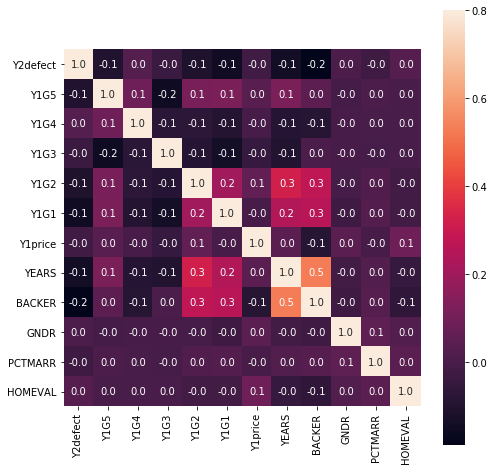

In [1364]:
# Correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

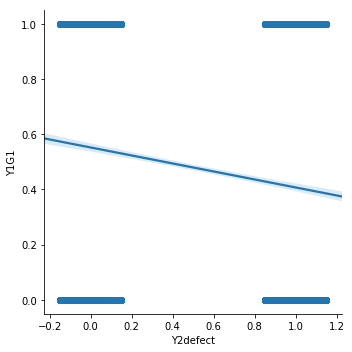

In [1365]:
# Find out any possible relationship between Y2defect and Y1G1 ... 
sns.lmplot("Y2defect", "Y1G1", df, x_jitter=.15)

The Lower a persons Y1G1 is. 
The less likely they are to be a defect.

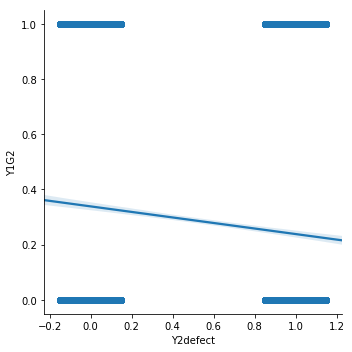

In [1366]:
# Find out any possible relationship between Y2defect and Y1G2 ...
sns.lmplot("Y2defect", "Y1G2", df, x_jitter=.15)

The Lower a persons Y1G2 is. 
The less likely they are to be a defect.

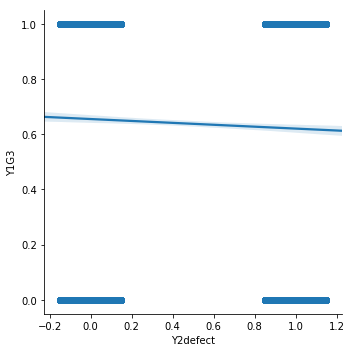

In [1367]:
# Find out any possible relationship between Y2defect and Y1G3 ...
sns.lmplot("Y2defect", "Y1G3", df, x_jitter=.15)

The Lower a persons Y1G3 is. 
The less likely they are to be a defect.
but iit is alomost even

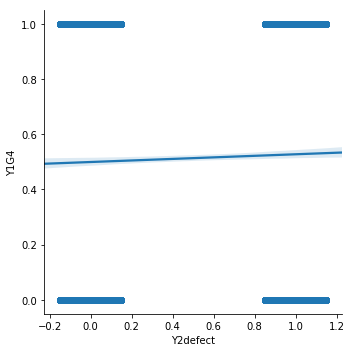

In [1368]:
# Find out any possible relationship between Y2defect and Y1G4 ...
sns.lmplot("Y2defect", "Y1G4", df, x_jitter=.15)

The Higher a persons Y1G4 is. 
The more likely they are to be a defect.

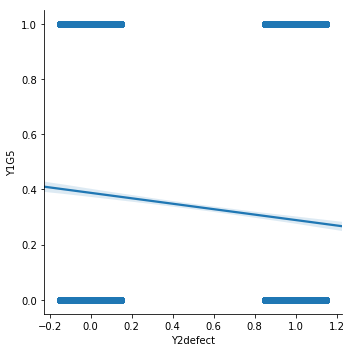

In [1369]:
# Find out any possible relationship between Y2defect and Y1G5 ...
sns.lmplot("Y2defect", "Y1G5", df, x_jitter=.15)

The Lower a persons Y1G5 is. 
The less likely they are to be a defect.

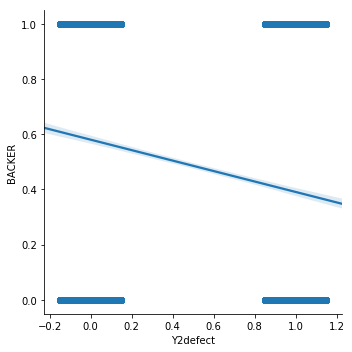

In [1370]:
# Find out any possible relationship between Y2defect and BACKER ...
sns.lmplot("Y2defect", "BACKER", df, x_jitter=.15)

The Lower a persons BACKER is. 
The less likely they are to be a defect.

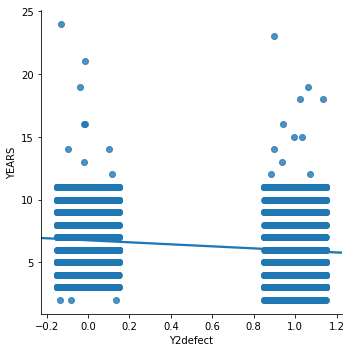

In [1371]:
# Find out any possible relationship between Y2defect and YEARS ...
sns.lmplot("Y2defect", "YEARS", df, x_jitter=.15)

The Lower a persons YEARS is. 
The less likely they are to be a defect.

The goal of the correlation analysis is to see whether two measurement variables co vary, and to quantify the strength of the relationship between the variables. As we saw we could probably get rid of Y1GX variables 

In [1372]:
#Drop the FakeID so the cops dont see it
dtf = df.drop(['FAKEID'], axis=1)

Train Test Split

In [1373]:
# What sound does a train make choo choo
from sklearn.model_selection import train_test_split
X = df[['YEARS','BACKER']]
y = df['Y2defect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1374]:
# Display first five rows of the new X 
X.head()

,YEARS,BACKER
0,8,1
1,3,1
2,11,1
3,4,0
4,5,0


### Training  Decision Tree Model

Tree = sits in the ground and remains in the same spot for hundreds of years.

In [1375]:
# It was just Earth Day lets Work with some Trees
from sklearn.tree import DecisionTreeClassifier

In [1376]:
#C reate an instance DTC called dtree and fit it to the training data
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1377]:
print metrics.accuracy_score(y_test, dtree.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dtree.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dtree.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dtree.predict(X_test))

0.60244648318
--------------------------------------------------------
[[916 384]
 [656 660]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.70      0.64      1300
          1       0.63      0.50      0.56      1316

avg / total       0.61      0.60      0.60      2616

--------------------------------------------------------
0.603067570727


### Predictions and Evaluation of Decision Tree

Create predictions from the test set and create a classification report and a confusion matrix.

In [1378]:
predictions = dtree.predict(X_test)

Im seeing a prediction of your future.That youre gonna become a great bussinessman.

In [1379]:
from sklearn.metrics import classification_report,confusion_matrix

In [1380]:
dtree = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
dtree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1381]:
#Print the dtree score
print("Regression coefficient:",dtree.score(X,y))

('Regression coefficient:', 0.080268152959429795)


In [1382]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()
#Print the page that makes us sad just doont look at the R-Squared Score.
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Y2defect   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 17 Apr 2018   Prob (F-statistic):           4.27e-74
Time:                        22:49:06   Log-Likelihood:                -6158.4
No. Observations:                8718   AIC:                         1.232e+04
Df Residuals:                    8715   BIC:                         1.234e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6382      0.013     49.794      0.0

In [1383]:
clf = RandomForestClassifier(n_estimators=20)    #Building 20 decision trees
clf=clf.fit(X, y)
#Display that beatufil CLF SCORE ohhh Yeahhhh
clf.score(X,y)

0.60713466391374171

In [1384]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[916 384]
 [656 660]]


The Matrix was the computer-generated dream world built to keep us under control in order to change a human being into a battery

### Training the Random Forest model
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [1334]:
#I think I alreaddy did this
from sklearn.ensemble import RandomForestClassifier

In [1335]:
rfc = RandomForestClassifier(n_estimators=600)

RFC stands for Room for cream. Used to let your barista know to leave it ½” to ¾” below the rim so you may add skim milk, half and half, or other accompaniments to your coffee beverage.

In [1336]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1269]:
rfc_pred = rfc.predict(X_test)

I ran the room for cream test

In [1270]:
roc = metrics.roc_auc_score(y_test, dtree.predict(X_test))

ROC stands for the Airport code for the most lamest city in the United States with a disproportionately violent crime rate: Rochester, N.Y.

In [1271]:
cr = classification_report(y_test,predictions)
print(cr)

             precision    recall  f1-score   support

          0       0.58      0.70      0.64      1300
          1       0.63      0.50      0.56      1316

avg / total       0.61      0.60      0.60      2616



More Cream please

In [1272]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[916 384]
 [656 660]]


I can tell you who else is confused besides this matrix. Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix

### Criterion gini

In [1273]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    roc = metrics.roc_auc_score(y_test, dtree.predict(X_test))
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
print(cm)
print(roc)

[[916 384]
 [656 660]]
0.652020399813


Here I attempted the criterion gini

### Criterion entropy

In [1274]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    roc = metrics.roc_auc_score(y_test, dtree.predict(X_test))
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
print(cm)
print(roc)

[[916 384]
 [656 660]]
0.652020399813


Here I attempted the criterion entropy

### Fixing max tree depth

In [1275]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    roc = metrics.roc_auc_score(y_test, dtree.predict(X_test))
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
print(cm)
print(roc)

[[970 330]
 [715 601]]
0.652020399813


Here I am Fixing max tree depth

### Minimum sample split criteria

In [1276]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    roc = metrics.roc_auc_score(y_test, dtree.predict(X_test))
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
print(cm)
print(roc)

[[916 384]
 [656 660]]
0.652020399813


The closest I think I ever got to winning

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

In [1277]:
#Save the Rainforest
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
print(cm)
print(roc)

[[970 330]
 [715 601]]
0.652020399813


^ this looks promising

## Model Deployment & Prepare Entry Data

In [1386]:
#Import my wrong model and Prepare the Entry of wrong Data
df2 = pd.read_excel("validation_dataset1.xlsx")
# Show us the first 5 wrong rows
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


The column names of validation dataset must be same as those of the training-testing dataset.

In [1387]:
# This is the validation of BAckers vs YEARS
validation = df2[['BACKER', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [1388]:
# And this is how you make a FAKEID
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [1391]:
# Applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# Generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# Joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# Joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# Generating submission file
risky_fans.to_excel("submissionentry.xlsx", index=False)

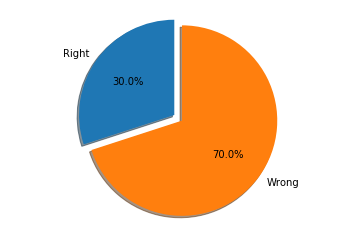

In [13]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Right', 'Wrong'
sizes = [30, 70]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Above you will find a pie chart showing you how wrong my guess was while doing this project

The goal of this project was to use various statistical methods to remove unimportant data and to make a model to predict if a person will buy a ticket or not. In examining the final model, one finds – quite reasonably – that years is the most important or is it... Backers as we were told to use is also something that is probably very important. Why else would you be in the Backers Club, the primary variable that can be seen is that the average person is positively correlated with income and child category. This makes sense and should be anticipated. There is also a positive correlation to Backers and Income because you need money to in a club. It is realistic to think that people in the backers club would continue to buy tickets. I personally think the model it weak and do not understand on how to make it more accurate. I tried to make this enjoyabe to grade moving the time due ahead by 4 days kinda hurt but it was still a fun class and I enjoyed taking this. Thank you 

    - RITCH